In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
file_path = "Tweets.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Display dataset info
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Step 1: Keep only relevant columns
data = data[['text', 'airline_sentiment', 'airline_sentiment_confidence']]
print("\nDataset after selecting relevant columns:")
print(data.head())

# Step 2: Filter by confidence level (optional)
confidence_threshold = 0.7
data = data[data['airline_sentiment_confidence'] >= confidence_threshold]
print(f"\nDataset after filtering by confidence > {confidence_threshold}:")
print(data['airline_sentiment'].value_counts())

# Step 3: Clean and preprocess the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z]", ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the clean_text function
data['cleaned_text'] = data['text'].apply(clean_text)
print("\nSample cleaned text:")
print(data[['text', 'cleaned_text']].head())

# Step 4: Encode sentiment labels
data['sentiment_label'] = data['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Step 5: Split the dataset into training and testing sets
X = data['cleaned_text']
y = data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Display shapes of processed data
print("\nTF-IDF Vectorized Data Shapes:")
print(f"X_train: {X_train_tfidf.shape}, X_test: {X_test_tfidf.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21556\1283928970.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='airline_sentiment', palette='viridis', order=data['airline_sentiment'].value_counts().index)


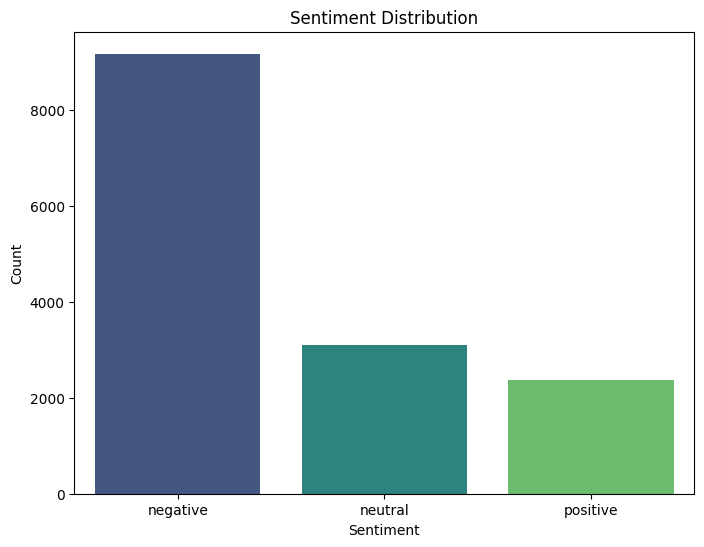


Airline Distribution:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21556\1283928970.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='airline', palette='Set2', order=data['airline'].value_counts().index)


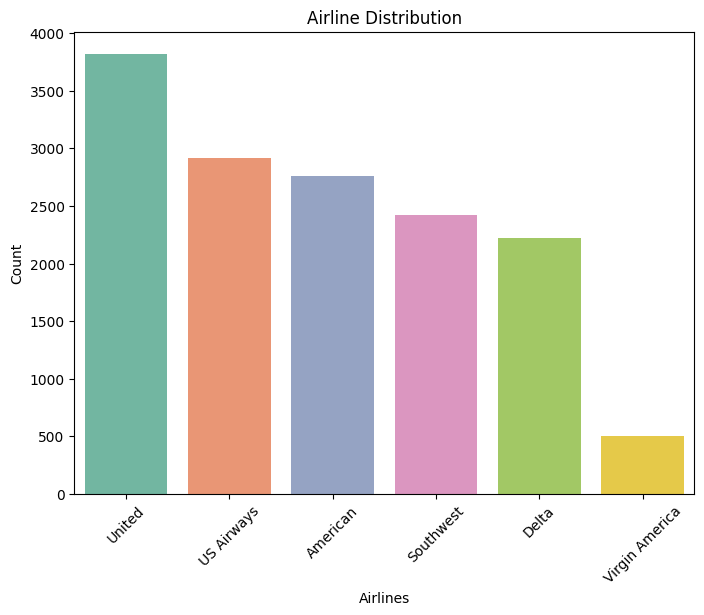

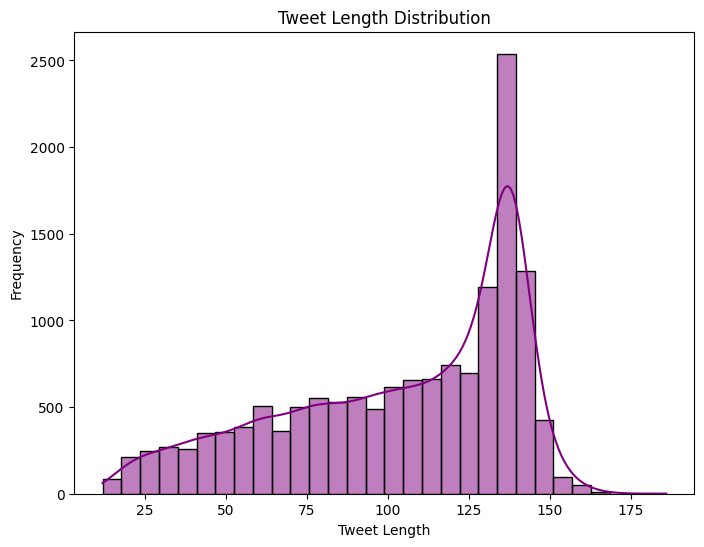


Average Sentiment by Airline:
airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


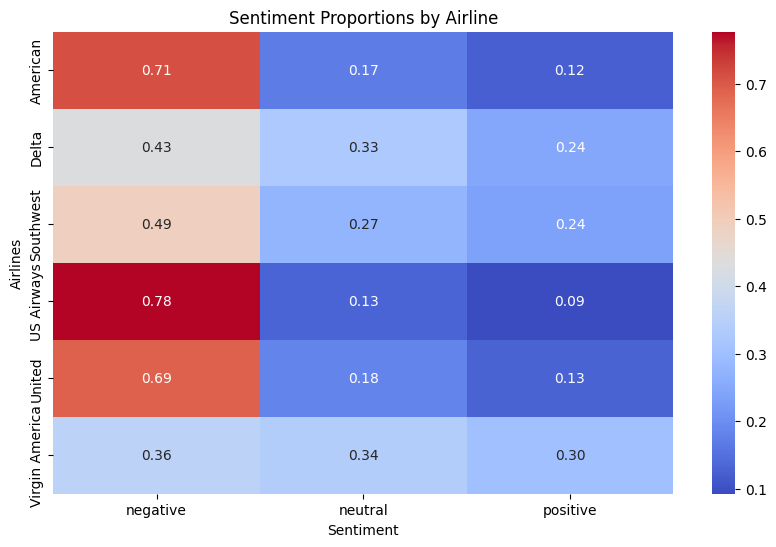

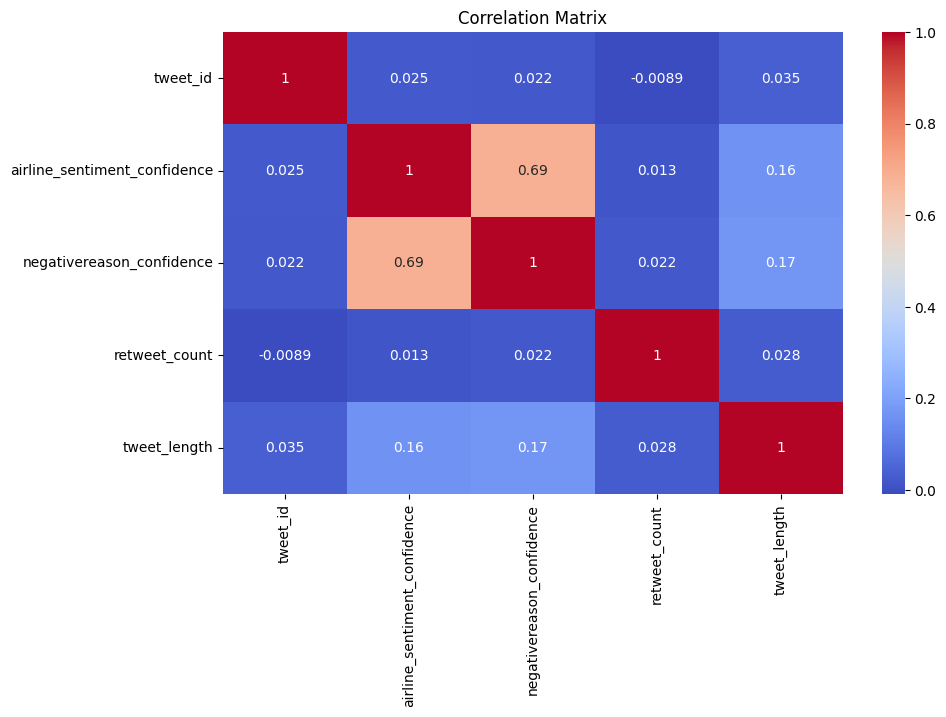

WordCloud module not installed. Skipping word cloud generation.


In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Tweets.csv')

# Basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())

# Value counts of the target variable
print("\nTarget Variable Distribution:")
print(data['airline_sentiment'].value_counts())

# Bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='airline_sentiment', palette='viridis', order=data['airline_sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Check the distribution of airlines
print("\nAirline Distribution:")
print(data['airline'].value_counts())

# Bar plot for airline distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='airline', palette='Set2', order=data['airline'].value_counts().index)
plt.title('Airline Distribution')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyzing the length of tweets
data['tweet_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Average sentiment by airline
average_sentiment = data.groupby('airline')['airline_sentiment'].value_counts(normalize=True).unstack()
print("\nAverage Sentiment by Airline:")
print(average_sentiment)

# Heatmap for average sentiment by airline
plt.figure(figsize=(10, 6))
sns.heatmap(average_sentiment, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Sentiment Proportions by Airline')
plt.ylabel('Airlines')
plt.xlabel('Sentiment')
plt.show()

# Checking for correlations (if numerical features exist)
# Checking for correlations (only numerical features)
numerical_data = data.select_dtypes(include=np.number)  # Select only numeric columns
if not numerical_data.empty:  # Proceed if there are numerical columns
    correlation_matrix = numerical_data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")


# Word cloud of tweets (optional, requires installation of wordcloud)
try:
    from wordcloud import WordCloud
    all_words = ' '.join(data['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tweets')
    plt.show()
except ImportError:
    print("WordCloud module not installed. Skipping word cloud generation.")


In [2]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

          -1       0.84      0.98      0.90      1500
           0       0.82      0.41      0.55       350
           1       0.88      0.67      0.76       304

    accuracy                           0.84      2154
   macro avg       0.85      0.69      0.74      2154
weighted avg       0.84      0.84      0.83      2154

Accuracy: 0.8430826369545033

Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

          -1       0.84      0.95      0.89      1500
           0       0.71      0.46      0.56       350
           1       0.78      0.62      0.69       304

    accuracy                           0.82      2154
   macro avg       0.78      0.68      0.71      2154
weighted avg       0.81      0.82      0.81      2154

Accuracy: 0.8221912720519963

Training SVM...

SVM Performance:
              precision

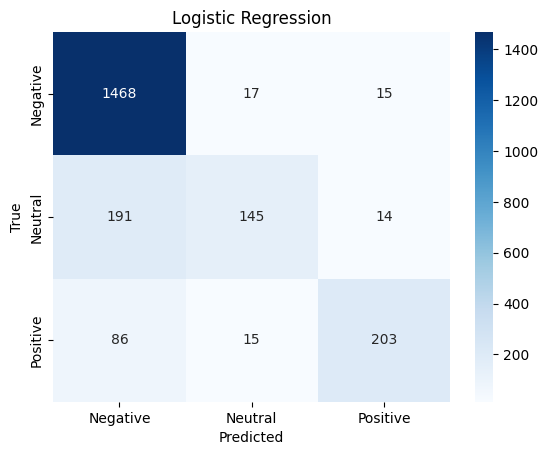

Random Forest:


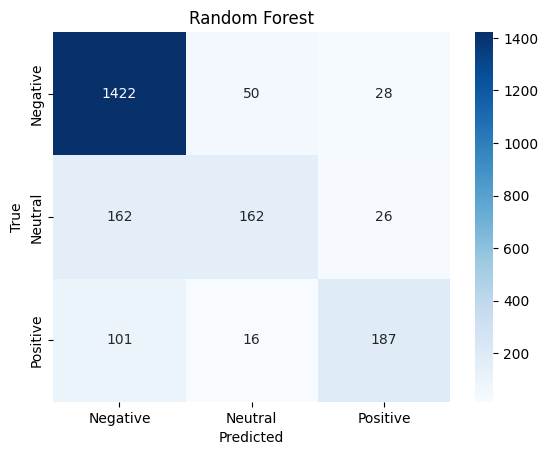

SVM:


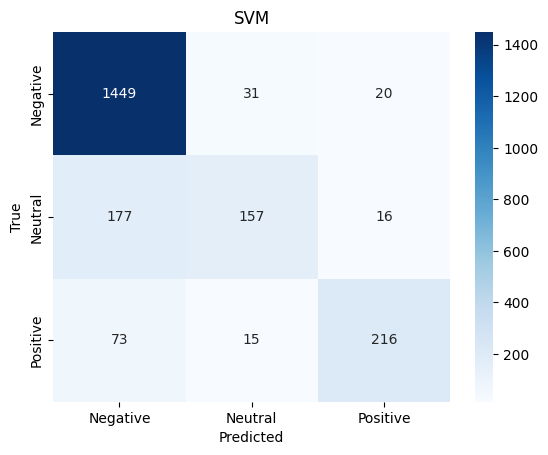

In [4]:
# Import ML models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train Logistic Regression
print("\nTraining Logistic Regression...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_tfidf)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Step 2: Train Random Forest
print("\nTraining Random Forest...")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Evaluate Random Forest
y_pred_rf = random_forest_model.predict(X_test_tfidf)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 3: Train SVM
print("\nTraining SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_tfidf)
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Step 4: Confusion Matrices
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for each model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

print("\nConfusion Matrices:")
print("Logistic Regression:")
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")

print("Random Forest:")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

print("SVM:")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")



Before SMOTE:
Counter({-1: 6052, 0: 1284, 1: 1278})

After SMOTE:
Counter({0: 6052, -1: 6052, 1: 6052})

Training Logistic Regression with SMOTE...

Logistic Regression Performance (with SMOTE):
              precision    recall  f1-score   support

          -1       0.91      0.87      0.89      1500
           0       0.59      0.67      0.63       350
           1       0.74      0.79      0.77       304

    accuracy                           0.82      2154
   macro avg       0.75      0.78      0.76      2154
weighted avg       0.83      0.82      0.83      2154

Accuracy: 0.8249767873723306

Training Random Forest with SMOTE...

Random Forest Performance (with SMOTE):
              precision    recall  f1-score   support

          -1       0.88      0.88      0.88      1500
           0       0.58      0.61      0.59       350
           1       0.74      0.70      0.72       304

    accuracy                           0.81      2154
   macro avg       0.73      0.73      0.73

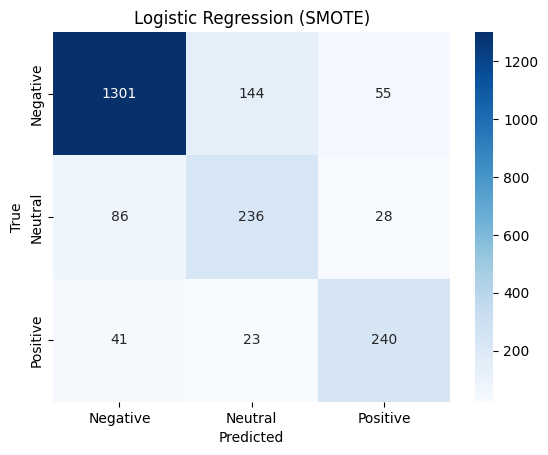

Random Forest:


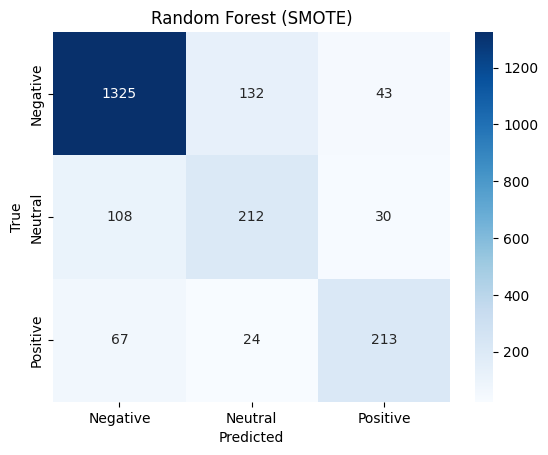

SVM:


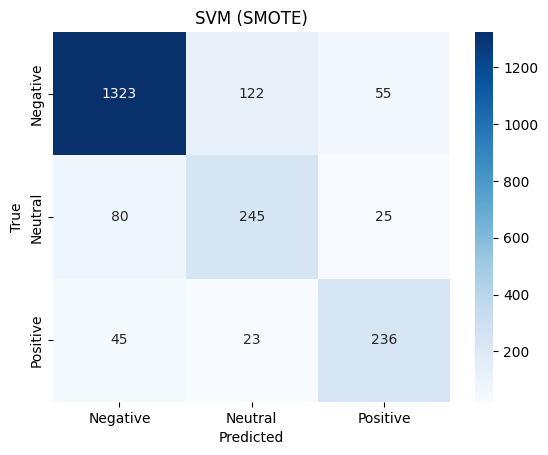

In [7]:
# Import the SMOTE library
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the dataset
print("\nBefore SMOTE:")
print(Counter(y_train))  # Class distribution before SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("\nAfter SMOTE:")
print(Counter(y_train_smote))  # Class distribution after SMOTE

# Train and evaluate models again

# Logistic Regression
print("\nTraining Logistic Regression with SMOTE...")
logistic_model_smote = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_smote.fit(X_train_smote, y_train_smote)
y_pred_logistic_smote = logistic_model_smote.predict(X_test_tfidf)
print("\nLogistic Regression Performance (with SMOTE):")
print(classification_report(y_test, y_pred_logistic_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_smote))

# Random Forest
print("\nTraining Random Forest with SMOTE...")
random_forest_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = random_forest_model_smote.predict(X_test_tfidf)
print("\nRandom Forest Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))

# SVM
print("\nTraining SVM with SMOTE...")
svm_model_smote = SVC(kernel='linear', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_model_smote.predict(X_test_tfidf)
print("\nSVM Performance (with SMOTE):")
print(classification_report(y_test, y_pred_svm_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_smote))

# Confusion Matrices after SMOTE
print("\nConfusion Matrices (with SMOTE):")

print("Logistic Regression:")
plot_confusion_matrix(y_test, y_pred_logistic_smote, "Logistic Regression (SMOTE)")

print("Random Forest:")
plot_confusion_matrix(y_test, y_pred_rf_smote, "Random Forest (SMOTE)")

print("SVM:")
plot_confusion_matrix(y_test, y_pred_svm_smote, "SVM (SMOTE)")


In [6]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Step 1: Load the dataset
import pandas as pd

# Load the dataset and check the column names
df = pd.read_csv("Tweets.csv")
print("Columns in the dataset:", df.columns)

# Inspect the first few rows to understand the structure of the dataset
print(df.head())

# Step 2: Identify the correct column for sentiment
# Replace 'label' with the correct column name for sentiment (e.g., 'airline_sentiment' or any other relevant column)
# Assuming the sentiment column is named 'airline_sentiment' and values are 'negative', 'neutral', and 'positive'

# Map the sentiment column to numeric values (-1 = Negative, 0 = Neutral, 1 = Positive)
df['sentiment_numeric'] = df['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})

# Step 3: Filter out neutral samples (label = 0)
df_binary = df[df['sentiment_numeric'] != 0]  # Keep only positive (1) and negative (-1)

# Step 4: Update the labels (optional, for binary classification clarity)
# Map -1 to 0 (negative) and 1 to 1 (positive)
df_binary['sentiment_numeric'] = df_binary['sentiment_numeric'].map({-1: 0, 1: 1})  # 0 = Negative, 1 = Positive

# Step 5: Split the filtered dataset
from sklearn.model_selection import train_test_split

# Assuming there is a column with preprocessed text, named 'cleaned_text'
# If 'cleaned_text' doesn't exist, use the column with raw text (e.g., 'text') and preprocess it
X = df_binary['text']  # Replace 'text' with the actual column name for the text data
y = df_binary['sentiment_numeric']  # Binary labels (negative = 0, positive = 1)

# Split into training and testing datasets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF to convert text into feature vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Include bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 7: Check the class distribution in the filtered dataset
from collections import Counter

print("Class distribution after removing neutral samples:")
print(Counter(y))  # Ensure the classes are balanced


Columns in the dataset: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN  

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21556\3297122444.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['sentiment_numeric'] = df_binary['sentiment_numeric'].map({-1: 0, 1: 1})  # 0 = Negative, 1 = Positive


Class distribution after removing neutral samples:
Counter({0: 9178, 1: 2363})


In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_balanced))

# Step 2: Train and evaluate Logistic Regression
print("\nTraining Logistic Regression with SMOTE...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

print("\nLogistic Regression Performance (with SMOTE):")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Step 3: Train and evaluate Random Forest
print("\nTraining Random Forest with SMOTE...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test_tfidf)

print("\nRandom Forest Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 4: Train and evaluate SVM
print("\nTraining SVM with SMOTE...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test_tfidf)

print("\nSVM Performance (with SMOTE):")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


NameError: name 'X_train_tfidf' is not defined

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# Step 1: Load Data (Replace with actual dataset)
df = pd.read_csv("Tweets.csv")
# X_text should be your text data (list or pandas Series)
# y should be your labels (0: Negative, 1: Positive)
X_text = df["text_column_name"].astype(str)  # Convert to string (if needed)
y = df["label_column_name"].values

# Step 2: Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_text)

# Step 3: Split data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Step 4: Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_balanced))


### TRAIN & EVALUATE MODELS ###

# Logistic Regression
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix (Logistic Regression):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_log_reg),
                   columns=["Predicted Negative", "Predicted Positive"],
                   index=["Actual Negative", "Actual Positive"]))

# Random Forest
print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test_tfidf)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf),
                   columns=["Predicted Negative", "Predicted Positive"],
                   index=["Actual Negative", "Actual Positive"]))

# Support Vector Machine (SVM)
print("\nTraining SVM...")
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test_tfidf)

print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix (SVM):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_svm),
                   columns=["Predicted Negative", "Predicted Positive"],
                   index=["Actual Negative", "Actual Positive"]))


KeyError: 'text_column_name'

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter


# Assuming you have X_train and X_test as text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_tfidf = vectorizer.transform(X_test)        # Transform test data

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_balanced))

# Step 2: Train and evaluate Logistic Regression
print("\nTraining Logistic Regression with SMOTE...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

print("\nLogistic Regression Performance (with SMOTE):")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Step 3: Train and evaluate Random Forest
print("\nTraining Random Forest with SMOTE...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test_tfidf)

print("\nRandom Forest Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Step 4: Train and evaluate SVM
print("\nTraining SVM with SMOTE...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test_tfidf)

print("\nSVM Performance (with SMOTE):")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


NameError: name 'X_train_tfidf' is not defined